In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import f_oneway, kruskal
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Read CSV
sus_df = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/sus_results/sus.csv')

In [3]:
# Filter 
filtered_sus_df = sus_df.iloc[:, 2:]
# Select columns with even and odd indices
odd_index_columns = filtered_sus_df.iloc[:, ::2]
even_index_columns = filtered_sus_df.iloc[:, 1::2]
# Subtract 1 from odd_index_columns
odd_index_columns = odd_index_columns - 1
# Subtract from 5 for even_index_columns
even_index_columns = 5 - even_index_columns
# Combine
processed_sus_df = even_index_columns.join(odd_index_columns)
# Sum
processed_sus_df['score'] = processed_sus_df.sum(axis=1)*2.5
# Average
print(processed_sus_df['score'].mean())
# Std
print(processed_sus_df['score'].std())

72.3170731707317
8.79257932688197


In [4]:
processed_sus_df

,q2,q4,q6,q8,q10,q1,q3,q5,q7,q9,score
0,3,3,4,3,1,3,3,3,2,3,70.0
1,1,4,1,3,4,0,2,2,4,4,62.5
2,2,3,4,2,4,2,1,3,2,4,67.5
3,3,4,3,3,3,3,3,3,3,3,77.5
4,3,4,4,3,3,3,3,3,4,3,82.5
5,2,4,3,3,3,1,1,3,3,2,62.5
6,3,3,3,3,3,3,3,3,3,3,75.0
7,3,4,3,3,3,2,3,3,3,2,72.5
8,4,3,3,3,3,3,3,3,3,3,77.5
9,3,3,2,3,3,3,3,2,3,2,67.5


In [4]:
### For archetype A ###
# Filter 
filtered_sus_df = sus_df[sus_df['user_archetype'] == 'a']
# Filter 
filtered_sus_df = filtered_sus_df.iloc[:, 2:]
# Select columns with even and odd indices
odd_index_columns = filtered_sus_df.iloc[:, ::2]
even_index_columns = filtered_sus_df.iloc[:, 1::2]
# Subtract 1 from odd_index_columns
odd_index_columns = odd_index_columns - 1
# Subtract from 5 for even_index_columns
even_index_columns = 5 - even_index_columns
# Combine
processed_sus_df = even_index_columns.join(odd_index_columns)
# Sum
processed_sus_df['score'] = processed_sus_df.sum(axis=1)*2.5
# Average
print(processed_sus_df['score'].mean())
# Std
print(processed_sus_df['score'].std())

70.97222222222223
8.494760014998558


In [5]:
### For archetype B ###
# Filter 
filtered_sus_df = sus_df[sus_df['user_archetype'] == 'b']
# Filter 
filtered_sus_df = filtered_sus_df.iloc[:, 2:]
# Select columns with even and odd indices
odd_index_columns = filtered_sus_df.iloc[:, ::2]
even_index_columns = filtered_sus_df.iloc[:, 1::2]
# Subtract 1 from odd_index_columns
odd_index_columns = odd_index_columns - 1
# Subtract from 5 for even_index_columns
even_index_columns = 5 - even_index_columns
# Combine
processed_sus_df = even_index_columns.join(odd_index_columns)
# Sum
processed_sus_df['score'] = processed_sus_df.sum(axis=1)*2.5
# Average
print(processed_sus_df['score'].mean())
# Std
print(processed_sus_df['score'].std())

73.8157894736842
9.367809133047938


In [4]:
def anover_kw_test(df, column):
    # Test for normality
    model = smf.ols(f"{column} ~ user_archetype + age_new + sex_new + medical_speciality_new + grade_new + ai_familiarity_new", data=df).fit()
    shapiro_stat, shapiro_p_value = stats.shapiro(model.resid)
    print(f"Shapiro test: W-statistic={shapiro_stat}, p-value={shapiro_p_value}")
    stats.normaltest(model.resid)
    stats.kstest(model.resid, 'norm')

    # Test for vairance
    # Levene's Test for user_archetype
    levene_archetype_stat, levene_archetype_p_value = stats.levene(df[column][df['user_archetype'] == 'a'],
                        df[column][df['user_archetype'] == 'b'])
    print(f"Levene's test for user_archetype: W-statistic={levene_archetype_stat}, p-value={levene_archetype_p_value}")
    # Levene's Test for age_new
    unique_ages = df['age_new'].unique()
    grouped_ages = [df[column][df['age_new'] == age] for age in unique_ages]
    levene_age_stat, levene_age_p_value = stats.levene(*grouped_ages)
    print(f"Levene's test for age_new: W-statistic={levene_age_stat}, p-value={levene_age_p_value}")
    # Levene's Test for sex_new
    levene_sex_stat, levene_sex_p_value = stats.levene(df[column][df['sex_new'] == 'Male'],
                        df[column][df['sex_new'] == 'Female'])
    print(f"Levene's test for sex_new: W-statistic={levene_sex_stat}, p-value={levene_sex_p_value}")
    # Levene's Test for medical_speciality_new
    unique_medical_specialities = df['medical_speciality_new'].unique()
    grouped_medical_specialities = [df[column][df['medical_speciality_new'] == speciality] for speciality in unique_medical_specialities]
    levene_speciality_stat, levene_speciality_p_value = stats.levene(*grouped_medical_specialities)
    print(f"Levene's test for medical_speciality_new: W-statistic={levene_speciality_stat}, p-value={levene_speciality_p_value}")
    # Levene's Test for grade_new
    unique_grades = df['grade_new'].unique()
    grouped_grades = [df[column][df['grade_new'] == grade] for grade in unique_grades]
    levene_grade_stat, levene_grade_p_value = stats.levene(*grouped_grades)
    print(f"Levene's test for grade_new: W-statistic={levene_grade_stat}, p-value={levene_grade_p_value}")
    # Levene's Test for ai_familiarity_new
    unique_ais = df['ai_familiarity_new'].unique()
    grouped_ais = [df[column][df['ai_familiarity_new'] == ai] for ai in unique_ais]
    levene_ai_stat, levene_ai_p_value = stats.levene(*grouped_ais)
    print(f"Levene's test for ai_familiarity_new: W-statistic={levene_ai_stat}, p-value={levene_ai_p_value}")

    if shapiro_p_value >= 0.05 and levene_archetype_p_value >=0.05 and levene_age_p_value >=0.05 and levene_sex_p_value >= 0.05 and levene_speciality_p_value >=0.05 and levene_grade_p_value >= 0.05 and levene_ai_p_value >= 0.05:
        anova_bool = True
    else:
        anova_bool = False

    print('\n')
    print('anova_bool:', anova_bool)
    print('\n')

    # Perform the appropriate test
    # Do anover independantly for each variable and collectivly 
    if anova_bool:
        print('Collective')
        model = ols(f"{column} ~ user_archetype + age_new + sex_new + medical_speciality_new + grade_new + ai_familiarity_new", data=df).fit()
        aov_table = sm.stats.anova_lm(model, typ=2)
        # Interpretation
        for index, row in aov_table.iterrows():
            sum_sq, df_value, f_value, pr_f = row
            print(f"ANOVA for {index}: Statistic={f_value:.4f}, p-value={pr_f:.4f}")
            if pr_f < 0.05:
                print(f"  -> The differences in {index} are statistically significant.\n")
            else:
                print(f"  -> The differences in {index} are not statistically significant.\n")

    # Function to perform ANOVA
    def perform_anova(df, group_var):
        groups = df.groupby(group_var)[column].apply(list)
        stat, p_value = f_oneway(*groups)
        return stat, p_value

    # Function to perform Kruskal-Wallis H test
    def perform_kruskal(df, group_var):
        groups = df.groupby(group_var)[column].apply(list)
        stat, p_value = kruskal(*groups)
        return stat, p_value

    print('\nIndependant')
    independent_vars = ['user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']
    results = {}
    for var in independent_vars:
        if anova_bool:
            stat, p_value = perform_anova(df, var)
            test_name = 'ANOVA'
        else:
            stat, p_value = perform_kruskal(df, var)
            test_name = 'Kruskal-Wallis'
        results[var] = {'test': test_name, 'statistic': stat, 'p_value': p_value}

    # Print the results
    for var, result in results.items():
        print(f"{result['test']} for {var}: Statistic={result['statistic']:.4f}, p-value={result['p_value']:.4f}")
        if result['p_value'] < 0.05:
            print(f"  -> The differences in {var} are statistically significant.\n")
        else:
            print(f"  -> The differences in {var} are not statistically significant.\n")

In [6]:
# Read CSV
demographics = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/demographic_results/demographics_processed.csv')
# Create df for demographic analysis
sus_demographics_df = pd.DataFrame(processed_sus_df[['score']]).join(sus_df['user_id'])
sus_demographics_df = sus_demographics_df.merge(demographics[['user_id', 'user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']])
# Imputation with Mode for categorical columns
sus_demographics_df['age_new'].fillna(sus_demographics_df['age_new'].mode()[0], inplace=True)
sus_demographics_df['sex_new'].fillna(sus_demographics_df['sex_new'].mode()[0], inplace=True)
sus_demographics_df['medical_speciality_new'].fillna(sus_demographics_df['medical_speciality_new'].mode()[0], inplace=True)
sus_demographics_df['grade_new'].fillna(sus_demographics_df['grade_new'].mode()[0], inplace=True)
sus_demographics_df['ai_familiarity_new'].fillna(sus_demographics_df['ai_familiarity_new'].mode()[0], inplace=True)
# Drop
sus_demographics_df.drop(columns='user_id', inplace=True)

In [7]:
sus_demographics_df

,score,user_archetype,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new
0,70.0,a,30s,Male,Pharmacist,Other,Slightly familiar
1,62.5,b,30s,Male,Infectious Diseases,Other,Slightly familiar
2,67.5,a,30s,Male,Infectious Diseases,Other,Slightly familiar
3,77.5,b,30s,Female,Infectious Diseases,Other,Not familiar
4,82.5,a,30s,Male,Other,Consultant,Slightly familiar
5,62.5,b,40s,Male,Other,Consultant,Moderately familiar
6,75.0,a,40s,Male,Pharmacist,Consultant,Slightly familiar
7,72.5,b,30s,Female,Pharmacist,Other,Moderately familiar
8,77.5,a,30s,Female,Pharmacist,Other,Slightly familiar
9,67.5,b,40s,Male,Microbiology,Consultant,Slightly familiar


In [8]:
anover_kw_test(sus_demographics_df, 'score')

Shapiro test: W-statistic=0.979160726070404, p-value=0.7024097442626953
Levene's test for user_archetype: W-statistic=0.02699324115769576, p-value=0.8704431392899902
Levene's test for age_new: W-statistic=1.8435309090087577, p-value=0.14478013253080874
Levene's test for sex_new: W-statistic=2.4927579269005693, p-value=0.12336765354813187
Levene's test for medical_speciality_new: W-statistic=0.6013500510797872, p-value=0.6187223767476131
Levene's test for grade_new: W-statistic=0.1138373174386723, p-value=0.7378321408125872
Levene's test for ai_familiarity_new: W-statistic=1.053061162853033, p-value=0.38219959630206723


anova_bool: True


Collective
ANOVA for user_archetype: Statistic=0.6526, p-value=0.4275
  -> The differences in user_archetype are not statistically significant.

ANOVA for age_new: Statistic=2.5762, p-value=0.0645
  -> The differences in age_new are not statistically significant.

ANOVA for sex_new: Statistic=0.0355, p-value=0.8523
  -> The differences in sex_new are 

In [55]:
def plot_boxplot_with_mean_median(df, cat_col, cont_col):
    plt.figure(figsize=(10, 6))
    box_plot = sns.boxplot(
        x=cat_col, y=cont_col, data=df, showmeans=True,
        boxprops=dict(facecolor="lightblue", color="lightblue"),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        flierprops=dict(markerfacecolor="black", markeredgecolor="black"),
        medianprops={"color": "darkblue", "linewidth": 2},
        meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"}
    )

    # Add legend
    handles = [
        plt.Line2D([0], [0], color='darkblue', lw=2, label='Median'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Mean')
    ]
    box_plot.legend(handles=handles, loc='lower right')

    plt.xlabel(cat_col.replace('_', ' ').title())
    plt.ylabel(cont_col.replace('_', ' ').title())
    plt.title(f'Box Plot of {cont_col.replace("_", " ").title()} by {cat_col.replace("_", " ").title()}')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.show()

/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


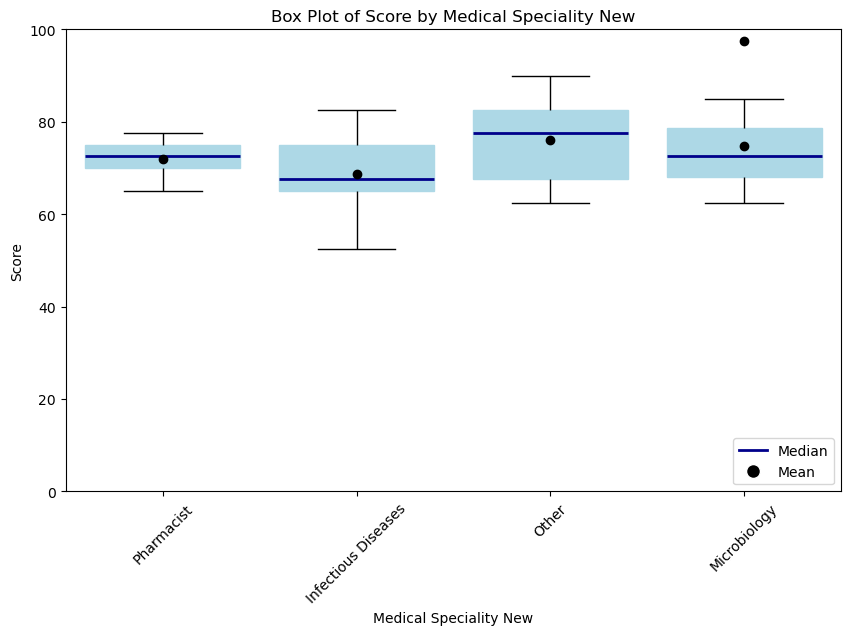

In [56]:
plot_boxplot_with_mean_median(sus_demographics_df, 'medical_speciality_new', 'score')

/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


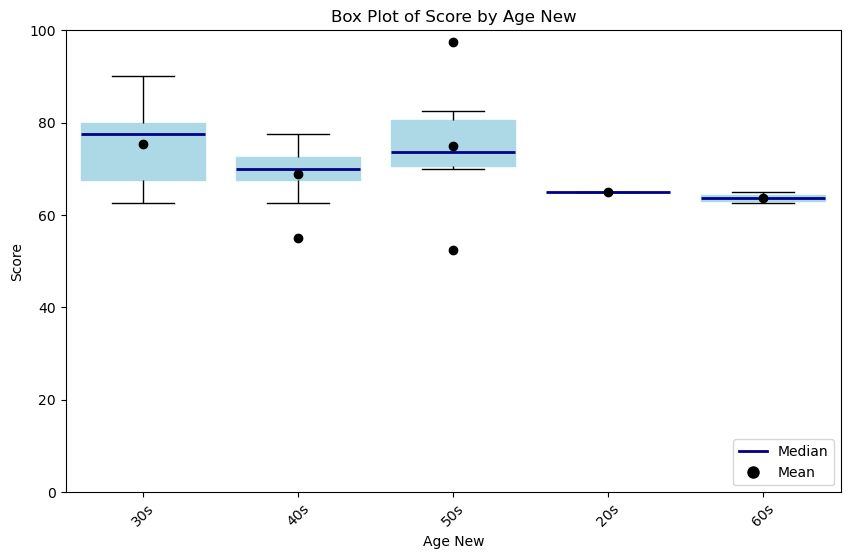

In [57]:
plot_boxplot_with_mean_median(sus_demographics_df, 'age_new', 'score')

/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


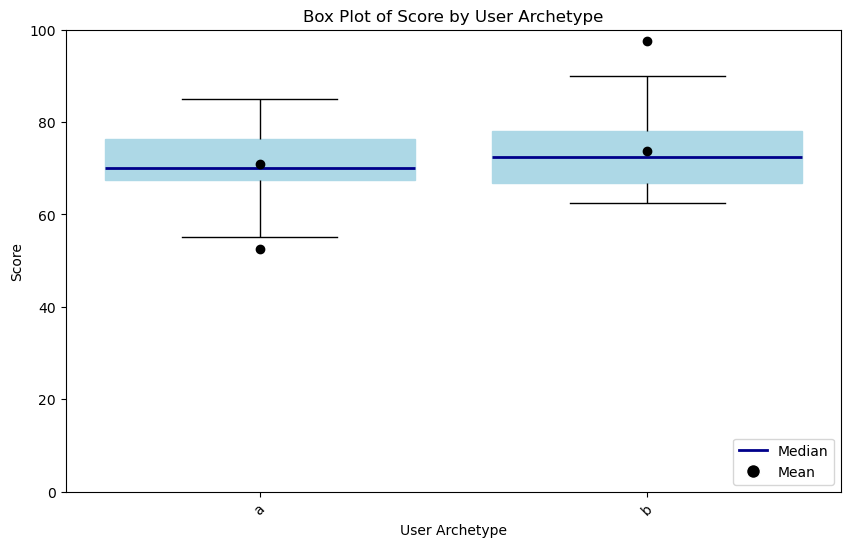

In [58]:
plot_boxplot_with_mean_median(sus_demographics_df, 'user_archetype', 'score')

TAM

In [12]:
# Read CSV
tam_df = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/tam_results/tam.csv')

In [13]:
tam_df['q23']

0     3
1     1
2     3
3     3
4     4
5     4
6     4
7     4
8     3
9     2
10    2
11    3
12    3
13    4
14    3
15    4
16    3
17    2
18    3
19    3
20    2
Name: q23, dtype: int64

21


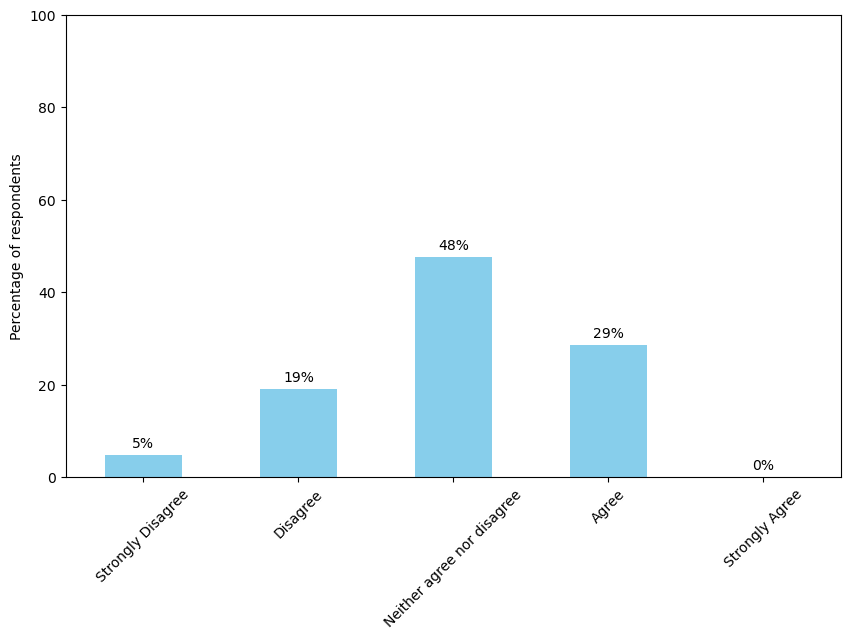

In [17]:
import matplotlib.pyplot as plt

# Create the Pandas Series
data = pd.Series([3, 1, 3, 3, 4, 4, 4, 4, 3, 2, 2, 3, 3, 4, 3, 4, 3, 2, 3, 3, 2])
print(len(data))
# Define the mapping of numbers to labels
labels = {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neither agree nor disagree', 4: 'Agree', 5: 'Strongly Agree'}

# Map the data to the labels
data_labels = data.map(labels)

# Count the occurrences of each label and convert to percentages
label_counts = data_labels.value_counts(normalize=True).reindex(labels.values(), fill_value=0) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = label_counts.plot(kind='bar', color='skyblue')
plt.ylabel('Percentage of respondents')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set the y-axis limit to 0-100%

# Annotate bars with percentage values
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height:.0f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()